This script basically loads the titanic data and performs Visualizations (Exploratory Data Analysis), imputation of the missing values, feature engineering and finally predicts the the outcome (survive or not) using several calssifiers and compares them based on the ROC score and ROC curve. 

Import libraries
================

In [299]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
#for numerical computaions we can use numpy library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load train & test data
======================

In [300]:
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("../data/train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check the number of rows and counts

In [301]:
titanic_test = pd.read_csv("../data/test.csv")
#transpose
titanic_test.head()
#note their is no Survived column here which is our target varible we are trying to predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [302]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
titanic.shape

(891, 12)

In [303]:
#Describe gives statistical information about numerical columns in the dataset
titanic.describe()
#you can check from count if there are missing vales in columns, here age has got missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [304]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [305]:
#lets see if there are any more columns with missing values 
#null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [306]:
#missing data in test dataset
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**yes even Embarked and cabin has missing values.**

**Age, Fare and cabin has missing values.
we will see how to fill missing values next.**

It's pretty useless if we run Ml algorithms without literally understanding the data, so here we goes data visualization.

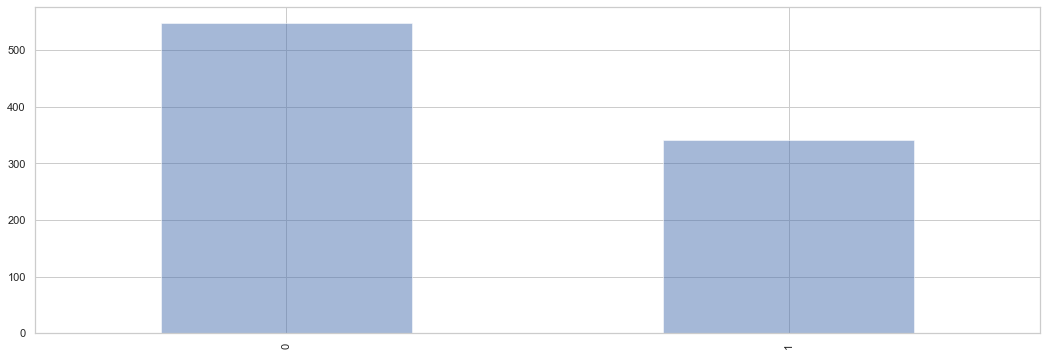

In [307]:
import matplotlib.pyplot as plt       ## wonderful library for data plotting
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure

titanic.Survived.value_counts().plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

We can obviously see that approximate of 350 people survived and 550 people died, we can use normalization technique inorder to view concreate percentages. (I am gonna copy paste the above cell code with the addition of normalization parameter )

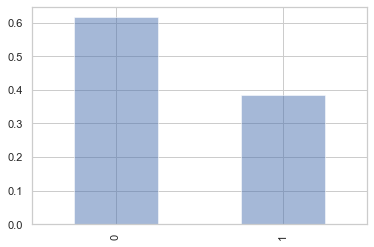

In [308]:
titanic.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

So from here we can see 40% people survived and 60% of people died. 

Since we have all age of the passengers, we can see the relationship between age and survival rate. Here as we gonna plot two different attributes scatter plot will do

Text(0.5, 1.0, 'Age wrt Survived')

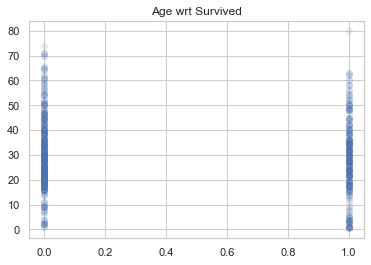

In [309]:
plt.scatter(titanic.Survived, titanic.Age, alpha=0.1)   ## here the plot has to be transparent so we need to pic low alpha value
plt.title("Age wrt Survived")

So From the above we can understand that, some of the older people died (between 50-70) and some of the younger people (between 20-40) survived more. 

Lets have a look at the counts plot of passenger class.

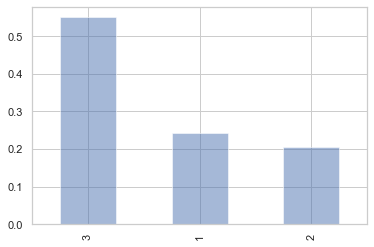

In [310]:
titanic.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

So From the above we infered that 55% of people are from 3rd class and 25% and 20% from the rest.

There are actually 2 plots that are pretty cool to use if we wanna find correlation between two different features. one is scatter plot which we seen above and another one is KDE (Kernal Desnsity estimation). Let's correlate passenger class with passengers age. 

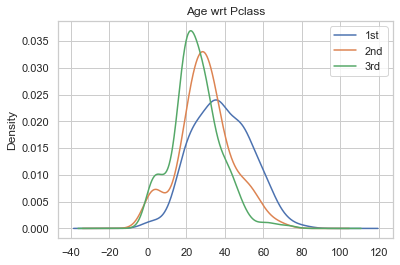

In [311]:
for x in [1,2,3]:    ## for 3 classes
    titanic.Age[titanic.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious. Atlast lets plot embarked feature.

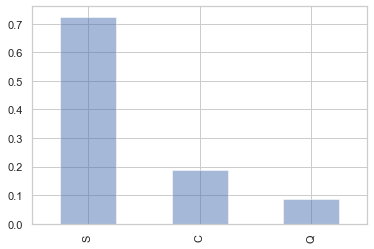

In [312]:
titanic.Embarked.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

**Visualizations**
==============

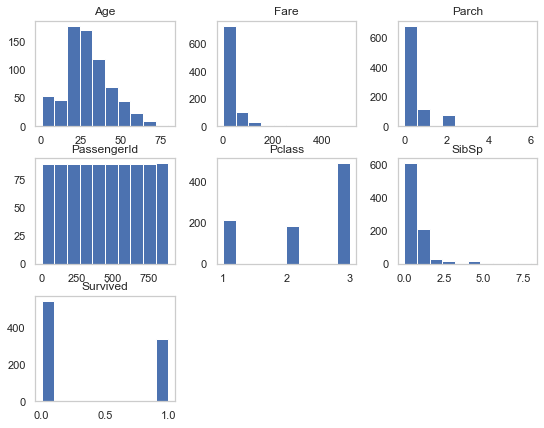

In [313]:
titanic.hist(bins=10,figsize=(9,7),grid=False);

**we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.**

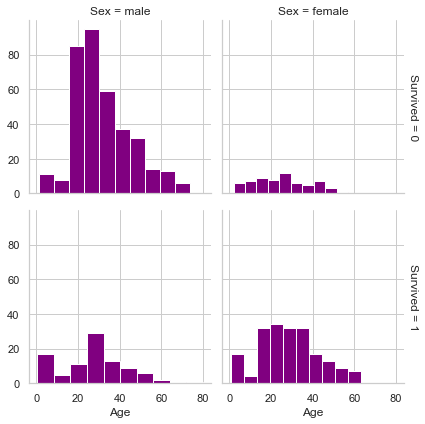

In [314]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

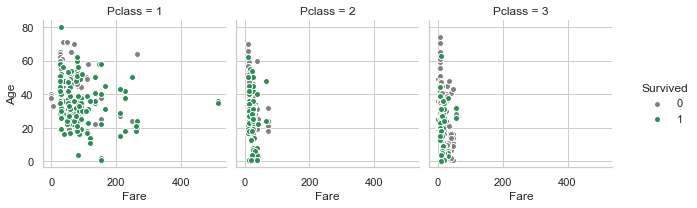

In [315]:
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

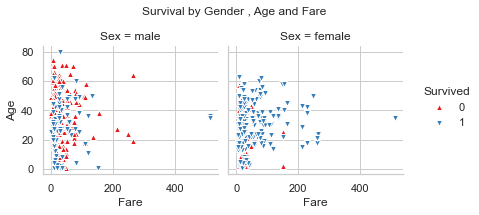

In [316]:
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

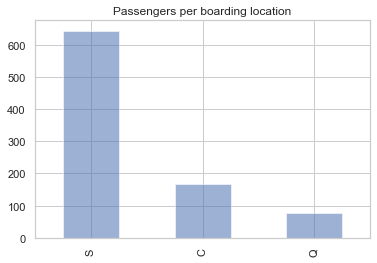

In [317]:
titanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

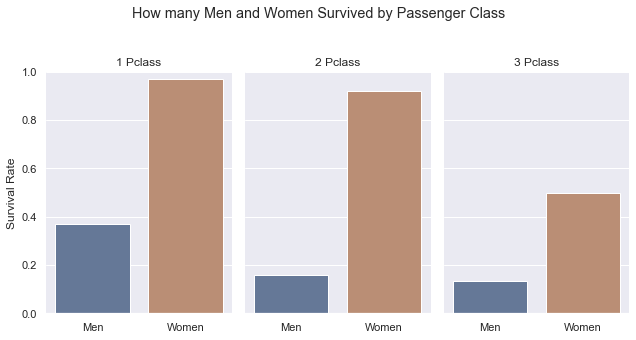

In [318]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

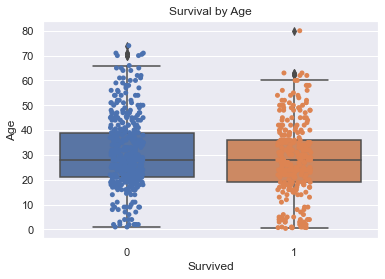

In [319]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Age",fontsize=12);

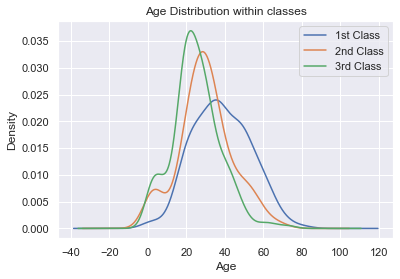

In [320]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

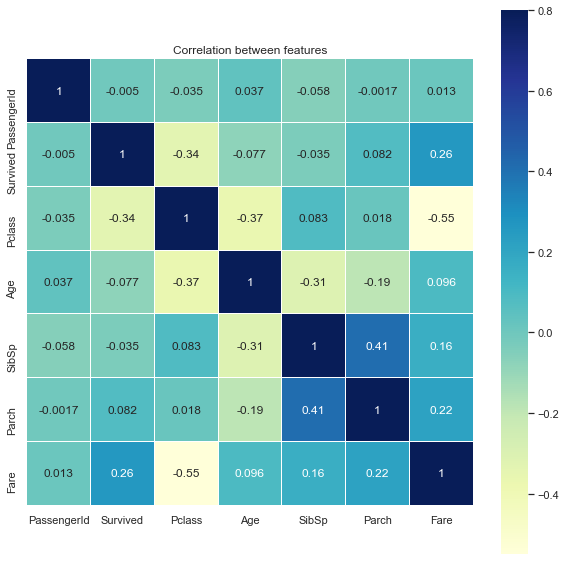

In [321]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [322]:
#correlation of features with target variable
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

**Looks like Pclass has got highest negative correlation with "Survived" followed by Fare, Parch and Age** 

In [323]:
#g = sns.factorplot(x="Age", y="Embarked",
#                    hue="Sex", row="Pclass",
#                    data=titanic[titanic.Embarked.notnull()],
#                    orient="h", size=2, aspect=3.5, 
#                   palette={'male':"purple", 'female':"blue"},
#                    kind="violin", split=True, cut=0, bw=.2);

Missing Value Imputation
========================

**Its important to fill missing values, because some machine learning algorithms can't accept them eg SVM.**

*But filling missing values with mean/median/mode is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.*

**Embarked Column**

In [324]:
#Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**PassengerId 62 and 830** have missing embarked values

Both have ***Passenger class 1*** and ***fare $80.***

Lets plot a graph to visualize and try to guess from where they embarked

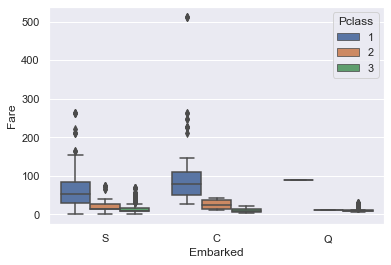

In [325]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic);

In [326]:
titanic["Embarked"] = titanic["Embarked"].fillna('C')

We can see that for ***1st class*** median line is coming around ***fare $80*** for ***embarked*** value ***'C'***.
So we can replace NA values in Embarked column with 'C'

In [327]:
#there is an empty fare column in test set
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


***Fare Column***

In [328]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [329]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

titanic_test=fill_missing_fare(titanic_test)

Feature Engineering
===================

***Deck- Where exactly were passenger on the ship?***

In [330]:
titanic["Deck"]=titanic.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanic["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

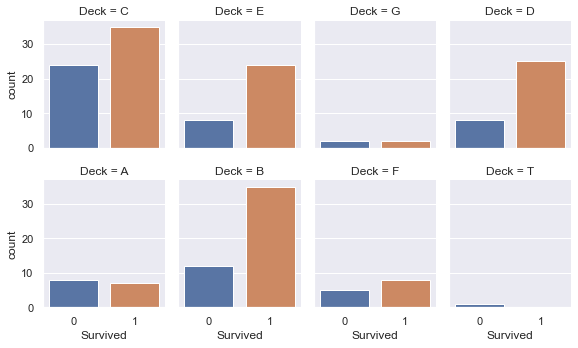

In [331]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=titanic[titanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8);

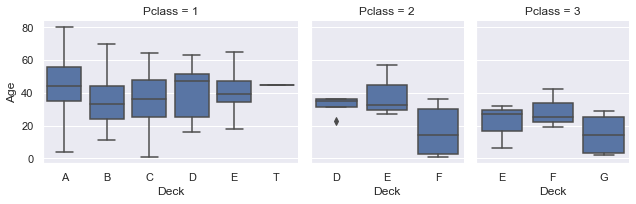

In [332]:
titanic = titanic.assign(Deck=titanic.Deck.astype(object)).sort_values("Deck")
g = sns.FacetGrid(titanic, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age");

In [333]:
titanic.Deck.fillna('Z', inplace=True)
titanic_test.Deck.fillna('Z', inplace=True)
titanic["Deck"].unique() # Z is for null values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

***How Big is your family?***

In [334]:
# Create a family size variable including the passenger themselves
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]+1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1
print(titanic["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [335]:
# Discretize family size
titanic.loc[titanic["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic.loc[(titanic["FamilySize"] > 1)  &  (titanic["FamilySize"] < 5) , "FsizeD"] = 'small'
titanic.loc[titanic["FamilySize"] >4, "FsizeD"] = 'large'

titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'
print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())

['singleton' 'small' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


In [336]:
#sns.factorplot(x="FsizeD", y="Survived", data=titanic);

***Whats in the name?***

***Ticket column***

In [337]:
titanic["Ticket"].tail()

884    SOTON/OQ 392076
885             382652
886             211536
888         W./C. 6607
890             370376
Name: Ticket, dtype: object

In [338]:
titanic["TicketNumber"] = titanic["Ticket"].str.extract('(\d{2,})', expand=True)
titanic["TicketNumber"] = titanic["TicketNumber"].apply(pd.to_numeric)


titanic_test["TicketNumber"] = titanic_test["Ticket"].str.extract('(\d{2,})', expand=True)
titanic_test["TicketNumber"] = titanic_test["TicketNumber"].apply(pd.to_numeric)

In [339]:
#some rows in ticket column dont have numeric value so we got NaN there
titanic[titanic["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,TicketNumber
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,1,singleton,NaN
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,Z,1,singleton,NaN


In [340]:
titanic.TicketNumber.fillna(titanic["TicketNumber"].median(), inplace=True)
titanic_test.TicketNumber.fillna(titanic_test["TicketNumber"].median(), inplace=True)

Convert Categorical variables into Numerical ones
=================================================

In [341]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"FsizeD",'Deck']
for col in cat_vars:
    titanic[col]=labelEnc.fit_transform(titanic[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,TicketNumber
475,476,0,1,"Clifford, Mr. George Quincy",1,NaN,0,0,110465,52.0000,A14,2,0,1,1,110465.0
174,175,0,1,"Smith, Mr. James Clinch",1,56.0,0,0,17764,30.6958,A7,0,0,1,1,17764.0
209,210,1,1,"Blank, Mr. Henry",1,40.0,0,0,112277,31.0000,A31,0,0,1,1,112277.0
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,2,0,3,2,33638.0
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.0,0,0,13213,35.5000,A26,0,0,1,1,13213.0


***Age Column***

Age seems to be promising feature.
So it doesnt make sense to simply fill null values out with median/mean/mode.

We will use ***Random Forest*** algorithm to predict ages. 

In [342]:
# finding the skewness and kutosis values of the ages
skewness = titanic.Age.skew()
kurtosis = titanic.Age.kurtosis()

print('skewness %s, kurtosis value %s' % (skewness, kurtosis))

skewness 0.3891077823008268, kurtosis value 0.1782741536421022


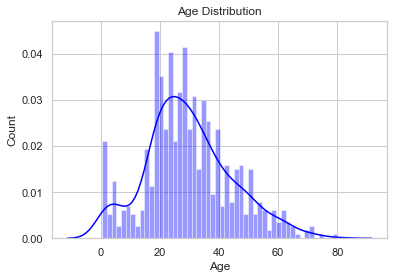

In [343]:
#with sns.plotting_context("notebook",font_scale=1.5):
sns.set_style("whitegrid")
sns.distplot(titanic["Age"].dropna(),bins=50,kde=True,color="blue")
plt.title("Age Distribution")
plt.ylabel("Count");

In [344]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Pclass','FamilySize',
                 'FsizeD','Deck']]
    # Split sets into train and test
    train  = age_df.loc[(df.Age.notnull())]# known Age values
    test = age_df.loc[(df.Age.isnull())]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1:]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1:])
    
    # Assign those predictions to the full data set
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges 
    
    return df

In [345]:
titanic=fill_missing_age(titanic)
titanic_test=fill_missing_age(titanic_test)

In [346]:
# finding the skewness and kutosis values of the ages
skewness = titanic.Age.skew()
kurtosis = titanic.Age.kurtosis()

print('skewness %s, kurtosis value %s' % (skewness, kurtosis))

skewness 0.4279307164271524, kurtosis value 0.42601971127250193


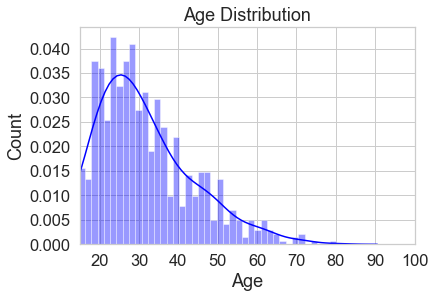

In [347]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=50,
                 kde=True,
                 color="blue")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));

**Feature Scaling**
===============

We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.

In [348]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = std_scale.transform(titanic[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = std_scale.transform(titanic_test[['Age', 'Fare']])

Correlation of features with target 
=======================

In [349]:
titanic.corr()["Survived"]

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.042655
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
TicketNumber   -0.096161
Name: Survived, dtype: float64

Predict Survival
================

*Linear Regression*
-------------------

In [350]:
def strified_cross_validation(n_split, model, data):
    import itertools
    # The columns we'll use to predict the target
    predictors = ["Pclass", "Embarked", "Sex", "Age","Fare","FsizeD","Deck"]
    target="Survived"

    X = data[predictors].dropna()
    y = pd.DataFrame(data[target].dropna())

    # Sklearn also has a helper that makes it easy to do cross validation
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=n_split)
    skf.get_n_splits(X, y)

    # Initialize our algorithm class
    alg = model
    predictions =[]
    cv_score = []
    
    for train, test in skf.split(X, y):
        # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
        train_predictors, test_predictors = X.loc[train,:], X.loc[test, :]
        # The target we're using to train the algorithm.
        train_target, test_target = y.loc[train, :], y.loc[test, :]
        # Training the algorithm using the predictors and target.
        alg.fit(train_predictors, train_target)
        # We can now make predictions on the test fold
        test_predictions = alg.predict(titanic[predictors].iloc[test,:])
        predictions.append(test_predictions)
    
    return predictions

In [351]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
predictions = strified_cross_validation(10, LinearRegression(), titanic)

In [352]:
predictions = np.concatenate(predictions, axis=0)
# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

In [353]:
accuracy=sum(titanic["Survived"]==predictions.flatten())/len(titanic["Survived"])
accuracy

0.590347923681257

In [354]:
def strified_cross_validation(n_split, classifier, data):
    import itertools
    # The columns we'll use to predict the target
    predictors = ["Pclass", "Embarked", "Sex", "Age","Fare","FsizeD","Deck"]
    target="Survived"

    X = data[predictors].dropna()
    y = pd.DataFrame(data[target].dropna())

    # Sklearn also has a helper that makes it easy to do cross validation
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=n_split)
    skf.get_n_splits(X, y)

    # Initialize our algorithm class
    alg = classifier
    predictions =[]
    cv_score = []
    
    for train, test in skf.split(X, y):
        # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
        train_predictors, test_predictors = X.loc[train,:], X.loc[test, :]
        # The target we're using to train the algorithm.
        train_target, test_target = y.loc[train, :], y.loc[test, :]
        # Training the algorithm using the predictors and target.
        alg.fit(train_predictors, train_target)
        score = roc_auc_score(test_target,alg.predict(test_predictors))
        #print('ROC AUC score:',score)
        cv_score.append(score)    
        display = plot_roc_curve(alg,test_predictors, test_target)
        plot_roc_curve(alg, test_predictors, test_target, ax = display.ax_)
        # We can now make predictions on the test fold
        test_predictions = alg.predict(titanic[predictors].iloc[test,:])
        predictions.append(test_predictions)
        
    proba = alg.predict_proba(test_predictors)[:,1]
    fpr,tpr, threshold = roc_curve(test_target,proba)
    roc_auc_ = auc(fpr,tpr)

    plt.figure(figsize=(14,8))
    plt.title('Reciever Operating Characteristics')
    plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')    
    
    return predictions

*Logistic Regression*
-------------------

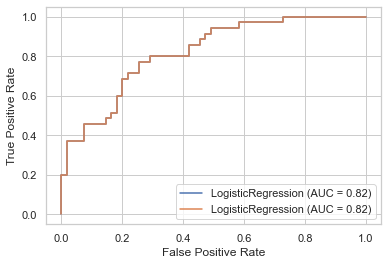

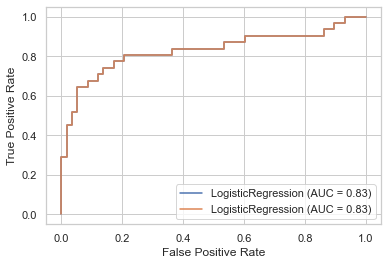

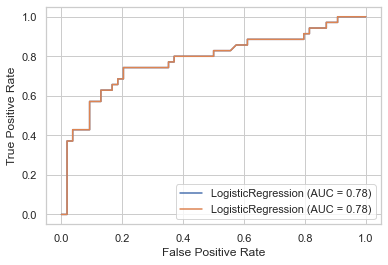

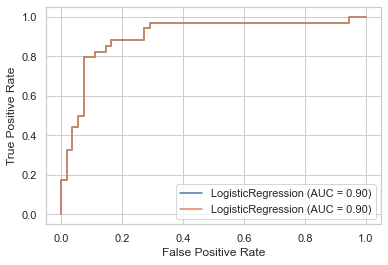

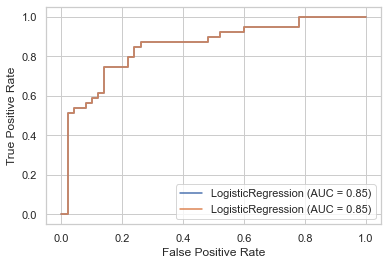

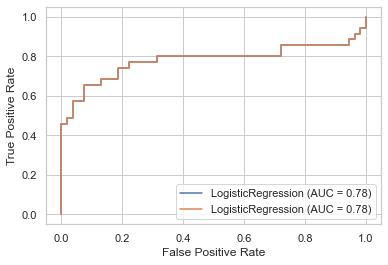

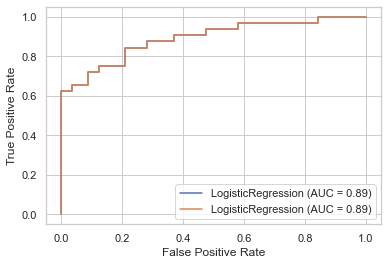

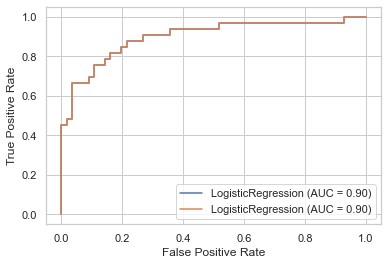

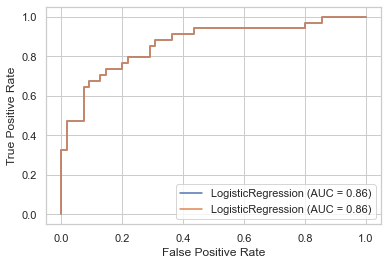

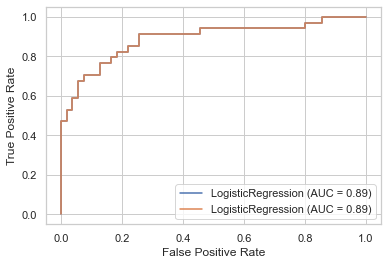

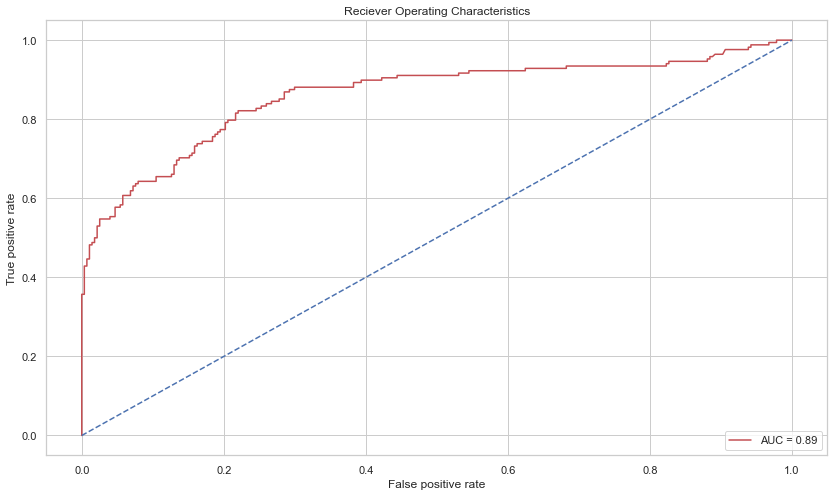

In [355]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
lr = LogisticRegression(random_state=1)
predictions = strified_cross_validation(10, lr, titanic)

In [356]:
#display = plot_roc_curve(lr, x_test, y_test)
#plot_roc_curve(lr, test_predictors, test_target, ax = display.ax_)
#plot_roc_curve(rf, x_test, y_test, ax = display.ax_)

*Random Forest with Grid Search *
----------------------------------------

In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
# 10-Fold Cross validation
print (np.mean(cross_val_score(clf, titanic[predictors], titanic['Survived'], cv=10, scoring='f1')))

0.7147582339123526


In [358]:
param_grid = {'n_estimators': [5, 10, 15, 20],'max_depth': [2, 5, 7, 9]}

In [359]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=10, scoring='f1')
grid_clf.fit(titanic[predictors], titanic['Survived'])

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]},
             scoring='f1')

In [360]:
print (grid_clf.cv_results_, grid_clf.best_params_, grid_clf.best_estimator_)

{'mean_fit_time': array([0.01003742, 0.01359534, 0.01909215, 0.0244523 , 0.008357  ,
       0.01431031, 0.01949284, 0.03122406, 0.01003821, 0.01555467,
       0.02052383, 0.02696514, 0.00835607, 0.01414697, 0.02011418,
       0.02764816]), 'std_fit_time': array([0.00113196, 0.00028161, 0.00089673, 0.00078774, 0.00067565,
       0.00111824, 0.00032589, 0.0024371 , 0.00089228, 0.0016939 ,
       0.00080751, 0.00053111, 0.00051827, 0.00020806, 0.00063177,
       0.00191611]), 'mean_score_time': array([0.00315666, 0.00287545, 0.00335367, 0.00371871, 0.00275531,
       0.00317981, 0.0032763 , 0.00473044, 0.00308723, 0.00306637,
       0.00352209, 0.00387766, 0.00250635, 0.00268946, 0.0030596 ,
       0.00358918]), 'std_score_time': array([3.27957543e-04, 9.34332723e-05, 3.37718904e-04, 1.90603485e-04,
       7.32708233e-04, 6.66741164e-04, 2.75826470e-04, 2.40433534e-04,
       2.44130562e-04, 4.41633065e-04, 5.64191774e-04, 4.24221126e-04,
       4.69884022e-04, 2.44750810e-05, 9.02738160e

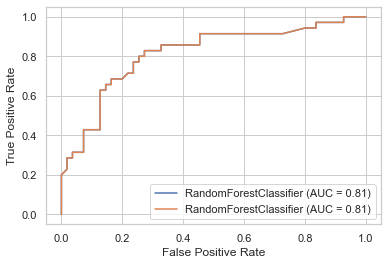

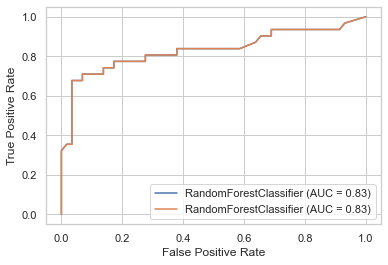

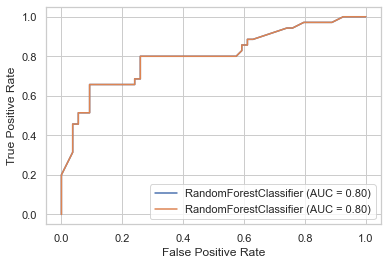

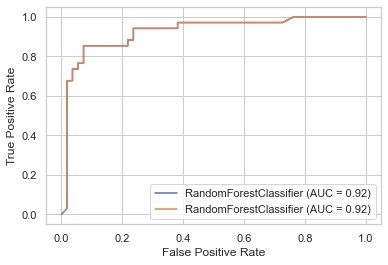

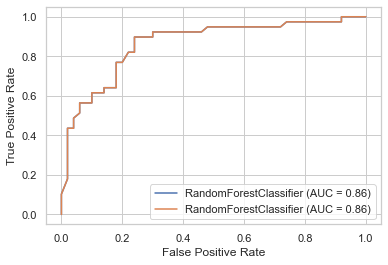

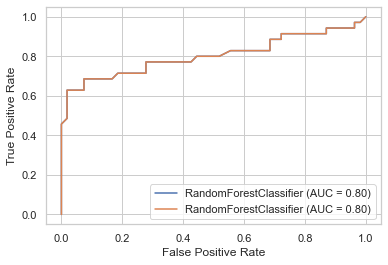

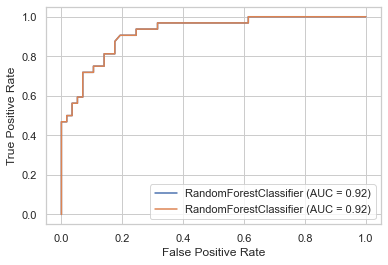

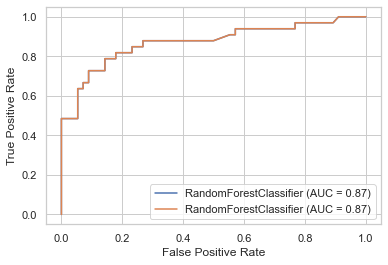

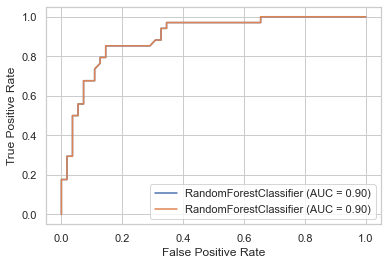

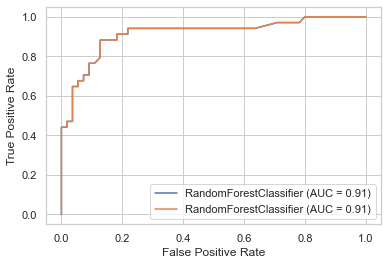

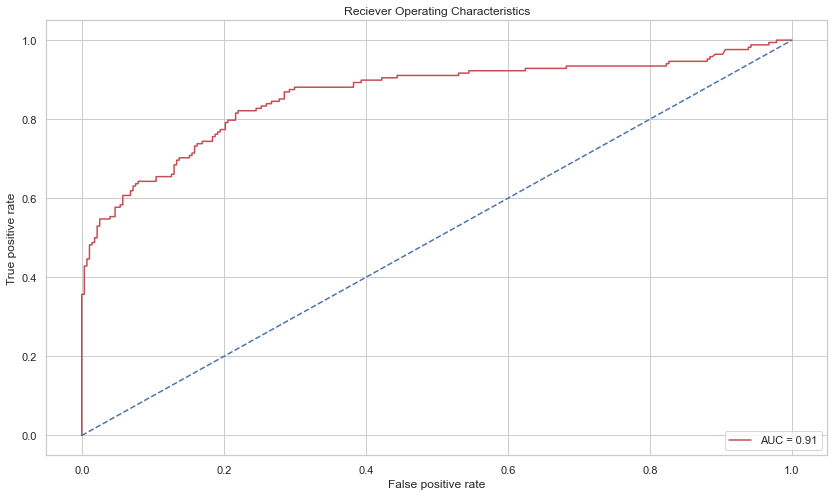

In [361]:
predictions = strified_cross_validation(10, grid_clf.best_estimator_, titanic)

Important features by Random Forest
==============================

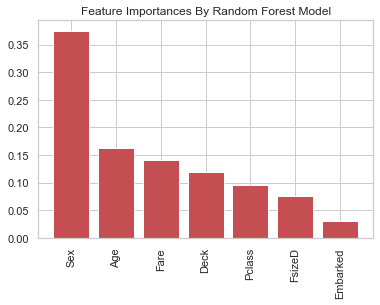

In [362]:
importances=grid_clf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure()
plt.title("Feature Importances By Random Forest Model")
for i, j in zip(sorted_important_features, np.sort(importances)[::-1]):
    plt.bar(i,j, color="r", align="center")
plt.xticks(rotation='vertical');
#plt.bar(range(np.size(predictors)), importances[indices],
#       color="r", align="center")
#plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical');

*Gradient Boosting*
-------------------

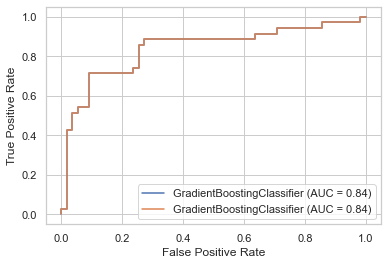

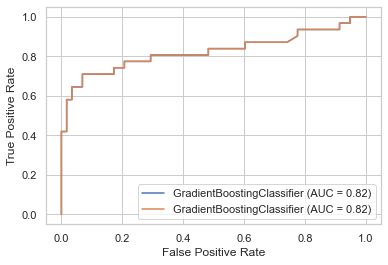

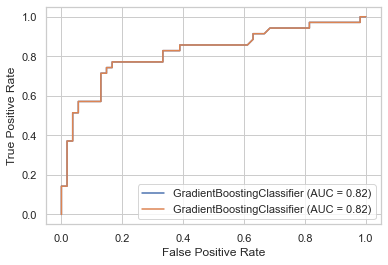

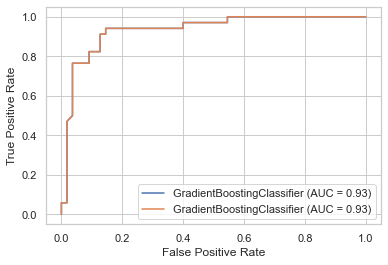

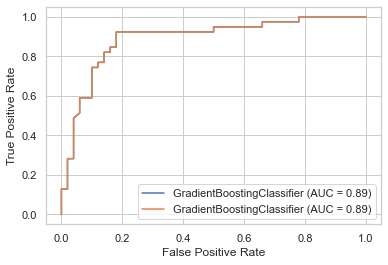

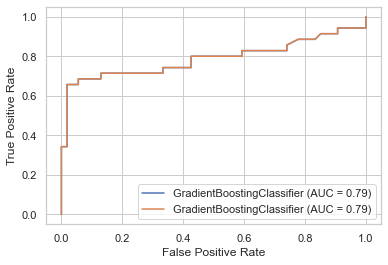

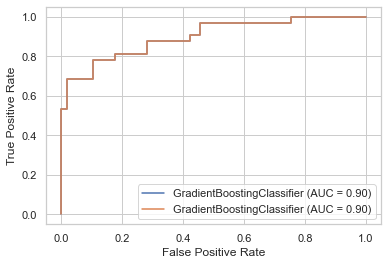

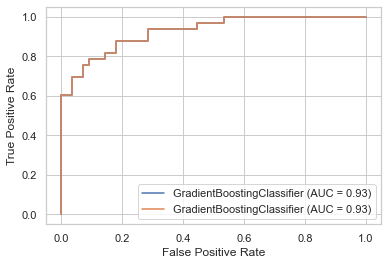

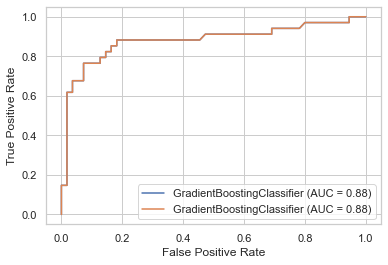

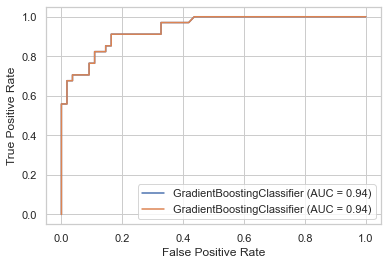

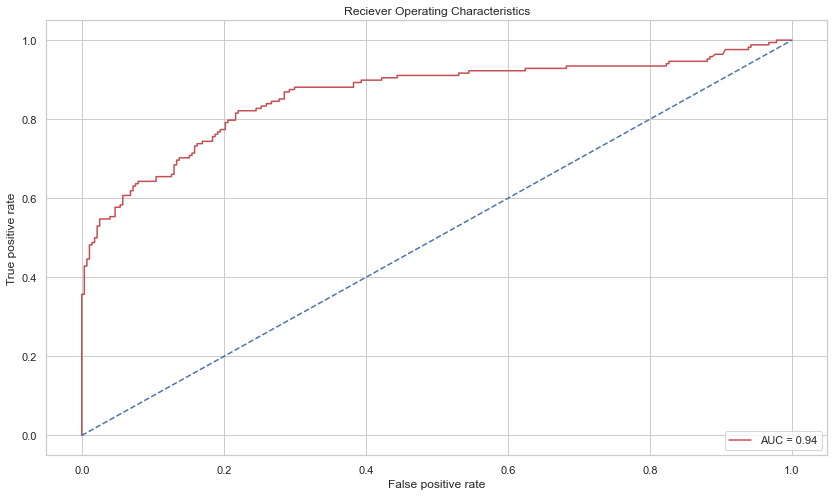

In [363]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt

GB = GradientBoostingClassifier()
predictions = strified_cross_validation(10, GB, titanic)

Important features by SelectKBest
================================

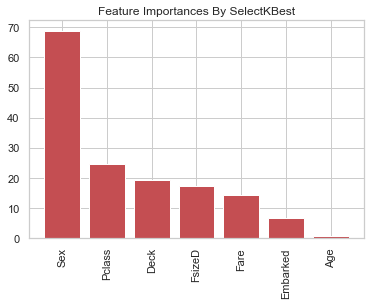

In [364]:
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By SelectKBest")
for i, j in zip(sorted_important_features, scores[indices]):
    plt.bar(i,j, color="r", align="center")
plt.xticks(rotation='vertical');


#plt.bar(range(np.size(predictors)), scores[indices],
#       color="seagreen",  align="center")
#plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')
#plt.xlim([-1, np.size(predictors)]);

*AdaBoost *
--------------------

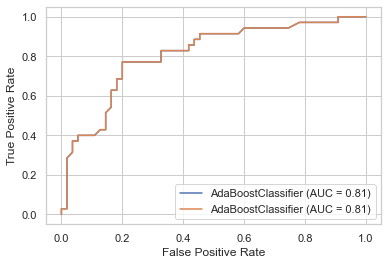

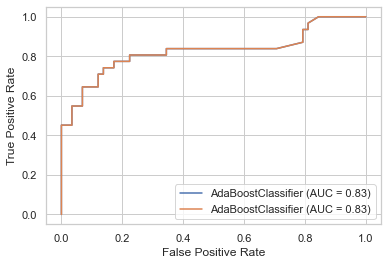

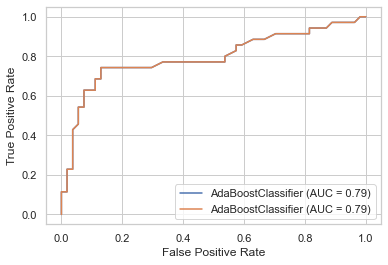

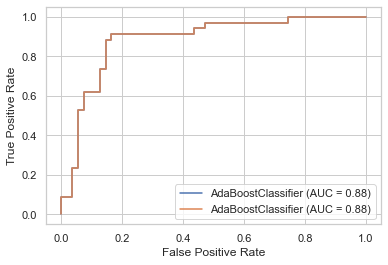

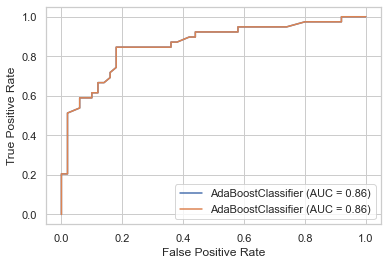

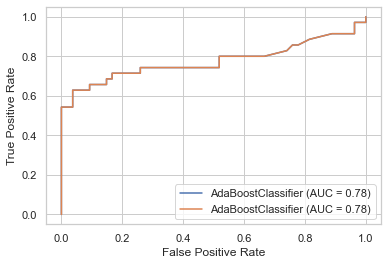

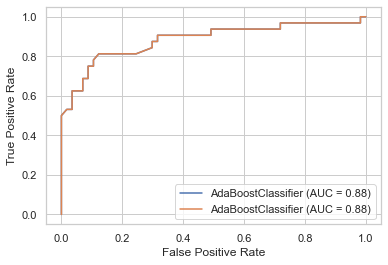

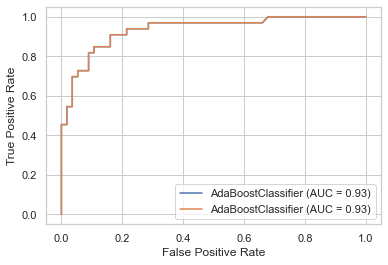

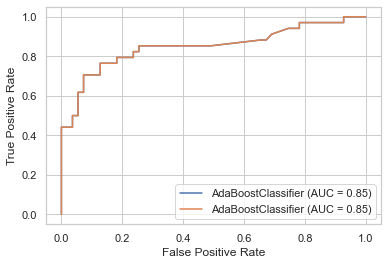

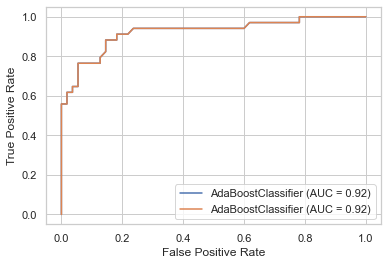

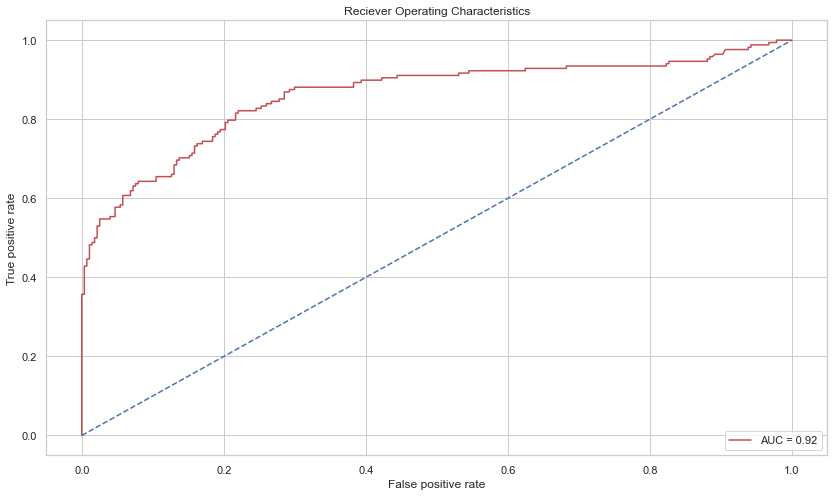

In [365]:
from sklearn.ensemble import AdaBoostClassifier

adb=AdaBoostClassifier()
predictions = strified_cross_validation(10, adb, titanic)

Maximum Voting ensemble and Submission
=======

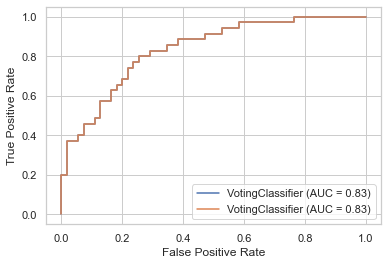

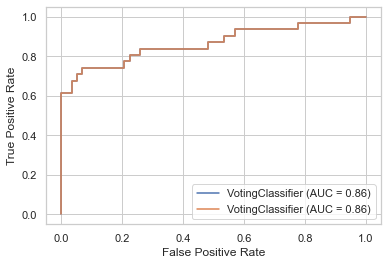

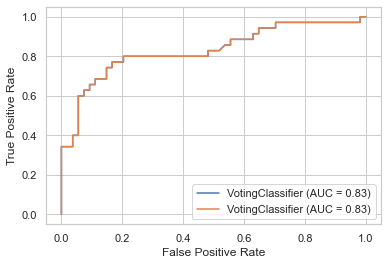

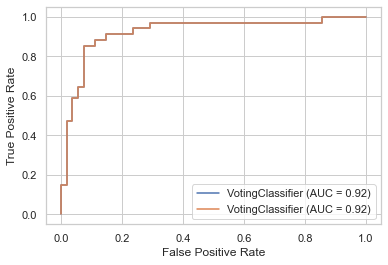

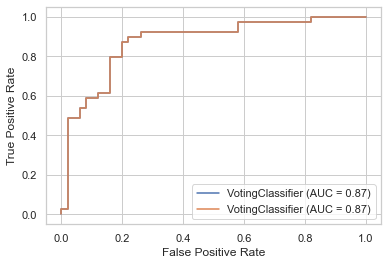

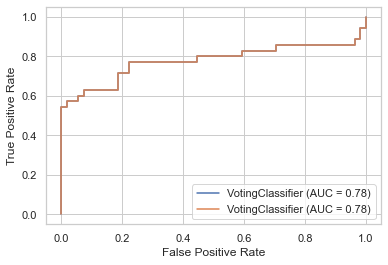

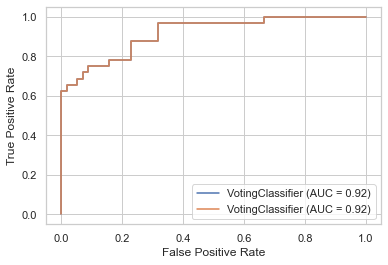

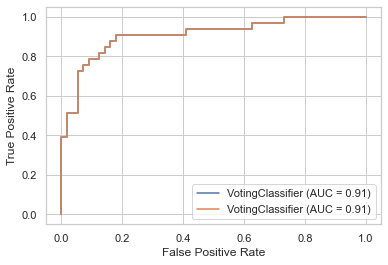

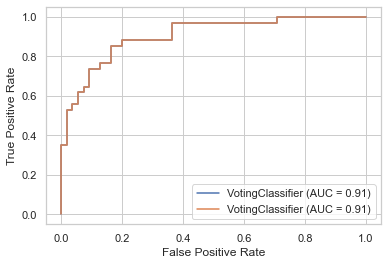

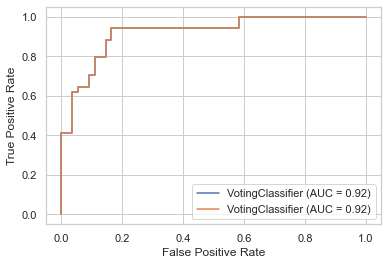

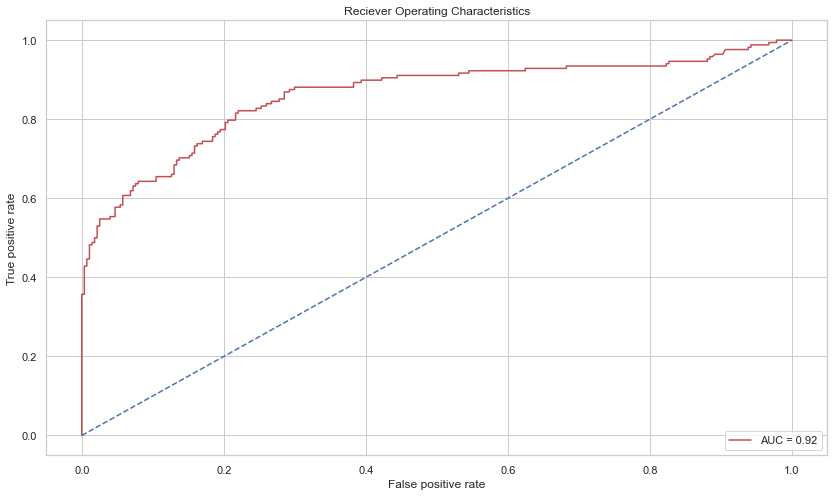

In [366]:
predictions=["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","NameLength","TicketNumber"]
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[
        ('lr', lr), ('rf', grid_clf.best_estimator_), ('adb', adb)], voting='soft')

predictions = strified_cross_validation(10, eclf1, titanic)
